In [1]:
import lightning as L
import torch
import torch.nn.functional as F
from torch import nn


# ruff: noqa: RET504
class SineModule(L.LightningModule):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 8)
        self.fc4 = nn.Linear(8, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.tanh(self.fc4(x))  # for output to be in -1 to 1
        return x

    def training_step(self, batch, batch_idx):
        # training_step defines the train loop.
        x, y = batch["x"], batch["sine"]
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.tanh(self.fc4(x))  # for output to be in -1 to 1

        loss = F.mse_loss(x.squeeze(), y)
        return loss

    def test_step(self, batch, batch_idx):
        # this is the test loop
        x, y = batch["x"], batch["sine"]
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.tanh(self.fc4(x))  # for output to be in -1 to 1

        test_loss = F.mse_loss(x.squeeze(), y)
        self.log("test_loss", test_loss)

    def validation_step(self, batch, batch_idx):
        # this is the validation loop
        x, y = batch["x"], batch["sine"]
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.tanh(self.fc4(x))  # for output to be in -1 to 1

        val_loss = F.mse_loss(x.squeeze(), y)
        self.log("val_loss", val_loss)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3)
        return optimizer

In [2]:
model = SineModule.load_from_checkpoint("lightning_logs/version_0/checkpoints/epoch=99-step=17500.ckpt")

In [3]:
model

SineModule(
  (fc1): Linear(in_features=1, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=1, bias=True)
)

In [4]:
import numpy as np

model.eval()

x = np.linspace(-5, 5, 100)
original_sine = np.sin(x)

y = []

with torch.no_grad():
    for _x in x:
        _x = torch.Tensor([_x])
        y_hat = model(_x)
        y.append(y_hat)

In [5]:
import matplotlib.pyplot as plt

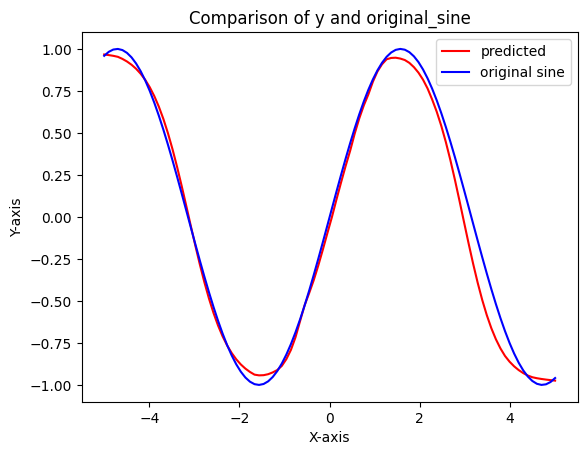

In [6]:
plt.plot(x, y, color="red", label="predicted")  # Red color for y
plt.plot(x, original_sine, color="blue", label="original sine")  # Blue color for original_sine

plt.legend()  # Show labels in the plot
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Comparison of y and original_sine")
plt.show()